<a href="https://colab.research.google.com/github/kratika-008/Crime-data-analysis/blob/main/PR1_A3_Sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Data Manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Predictive Analytics models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



**Data Import**

In [4]:
train_dataset = pd.read_csv('train_dataset.csv')


train_dataset=train_dataset.drop(['Id'], axis = 1)

print(train_dataset.keys())

Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')


In [99]:

test_datasett = pd.read_csv('test_dataset.csv')

test_dataset=test_datasett.drop(['Id'], axis = 1)

print(test_dataset.keys())

Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope'],
      dtype='object')


**Train Dataset Summary**

In [6]:
train_dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.602180,132.957766,198.339237,0.234332,136.426431,0.902180,0.553134
std,9.528147,18.819299,109.263181,0.423870,25.729613,1.050003,0.497508
min,28.000000,0.000000,0.000000,0.000000,63.000000,-2.000000,0.000000
25%,47.000000,120.000000,172.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.500000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,141.750000,265.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Check For Missing Values**

In [7]:
train_dataset.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Split the dataset into predictors (df_x) and target variable (df_y)**

In [10]:
df_x = train_dataset[['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak','ST_Slope']]
df_y = train_dataset[['HeartDisease']]

In [11]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Gender          734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 63.2+ KB



**Created Dummy Variables in Train and Test Dataset** 

In [100]:
train_dataset_d=pd.get_dummies(df_x)
test_dataset_d=pd.get_dummies(test_dataset)


# Data Exploration

**Correlation Plot**

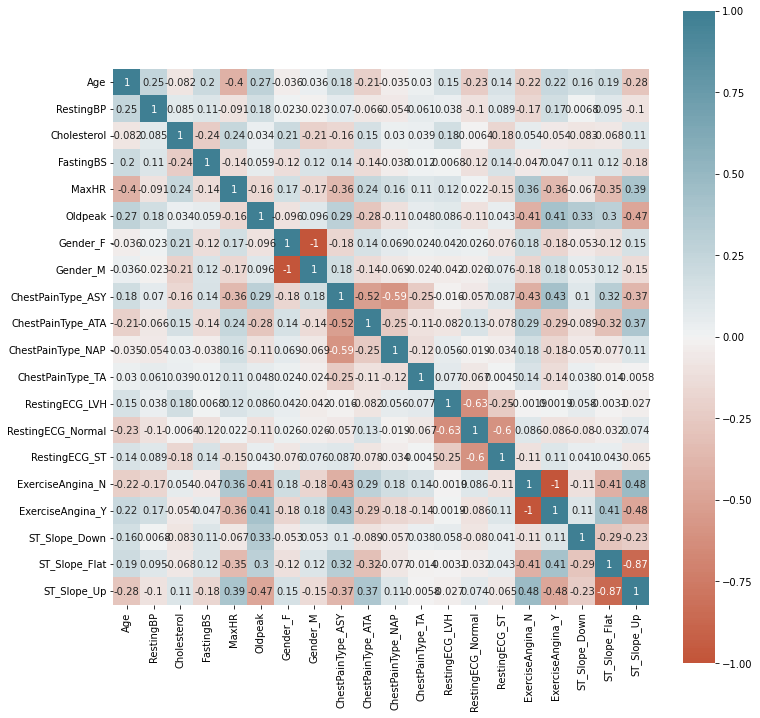

In [68]:

plt.figure(figsize=(12, 12))
corr = train_dataset_d.corr()
sns.heatmap(corr, annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

# New Section

Checking Skewness of distribution Data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfcf0971d0>,
      dtype=object)

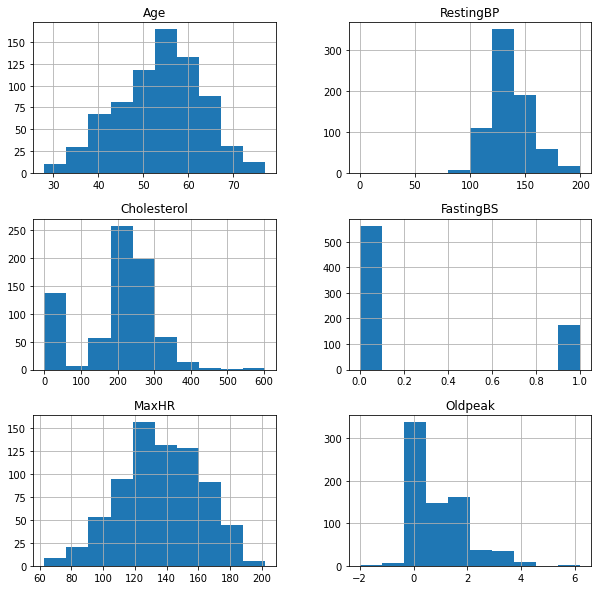

In [14]:
df_x.hist(figsize=(10, 10))

**Visual Insights**

Text(0.5, 1.0, 'Gender based Heart Disease Distribution')

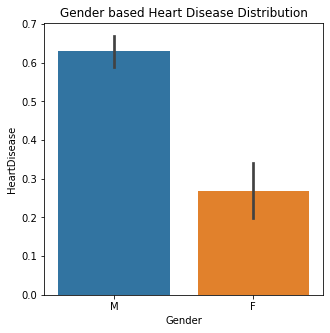

In [41]:
plt.figure(figsize=(5,5))
sns.barplot(x="Gender",y="HeartDisease",data=train_dataset)
plt.title("Gender based Heart Disease Distribution")

Text(0.5, 1.0, 'Chest Pain Type by Heart Disease Distribution')

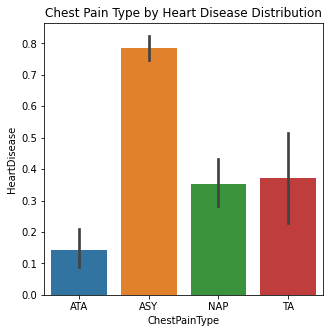

In [44]:
plt.figure(figsize=(5,5))
sns.barplot(x="ChestPainType",y="HeartDisease",data=train_dataset)
plt.title("Chest Pain Type by Heart Disease Distribution")

Text(0.5, 1.0, 'FastingBS Type by Heart Disease Distribution')

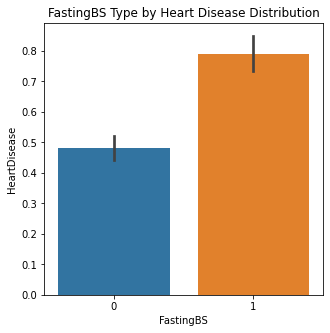

In [45]:
plt.figure(figsize=(5,5))
sns.barplot(x="FastingBS",y="HeartDisease",data=train_dataset)
plt.title("FastingBS Type by Heart Disease Distribution")

Text(0.5, 1.0, 'RestingECG by Heart Disease Distribution')

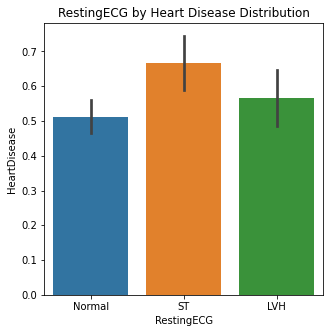

In [47]:
plt.figure(figsize=(5,5))
sns.barplot(x="RestingECG",y="HeartDisease",data=train_dataset)
plt.title("RestingECG by Heart Disease Distribution")

Text(0.5, 1.0, 'St_Slope by Heart Disease Distribution')

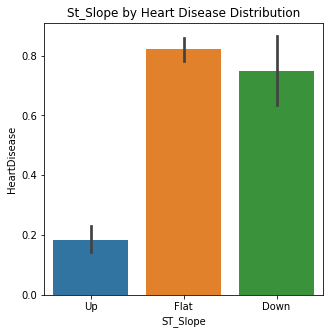

In [49]:
plt.figure(figsize=(5,5))
sns.barplot(x="ST_Slope",y="HeartDisease",data=train_dataset)
plt.title("St_Slope by Heart Disease Distribution")

Text(0.5, 1.0, 'Excersise Angina based Heart Disease Distribution')

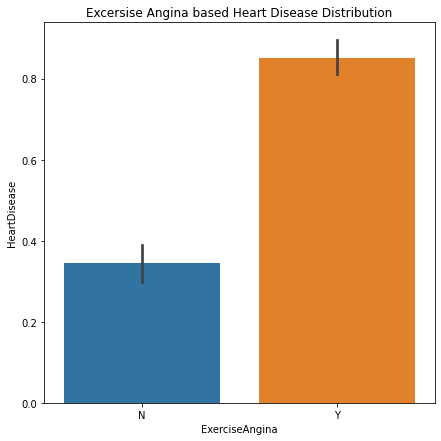

In [51]:
plt.figure(figsize=(7,7))
sns.barplot(x="ExerciseAngina",y="HeartDisease",data=train_dataset)
plt.title("Excersise Angina based Heart Disease Distribution")

# Data Splitting for Test

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(train_dataset_d, df_y, test_size = 0.33, random_state = 42)

# Model Building

**Logistic Regression Model**

In [52]:
LR_Reg=LogisticRegression()
LR_Reg.fit(X_train,Y_train)
y_predict=LR_Reg.predict(X_test)
accuracy= accuracy_score(y_predict,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
## accuracy score
print("accuracy score : ",accuracy_score(Y_test,y_predict))

## percentage accurate
print("accuracy:", round(100*accuracy_score(Y_test,y_predict)),"%")

accuracy score :  0.8641975308641975
accuracy: 86 %


In [141]:
Lr_Predict=LR_Reg.predict(test_dataset_d)

In [142]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       109
           1       0.88      0.87      0.88       134

    accuracy                           0.86       243
   macro avg       0.86      0.86      0.86       243
weighted avg       0.86      0.86      0.86       243



Confusion matrix is 
 [[ 93  16]
 [ 17 117]]


Text(42.0, 0.5, 'predicted label')

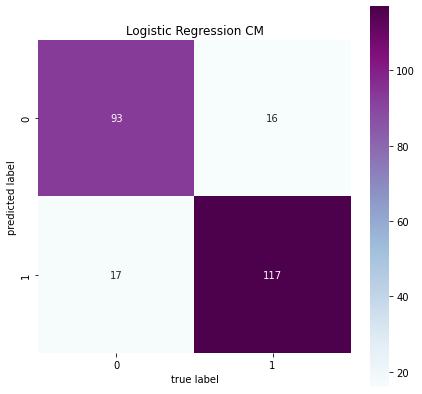

In [143]:
## confusion matrix
confusion_matrix=confusion_matrix(Y_test,y_predict)
print("Confusion matrix is \n",confusion_matrix)

## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(confusion_matrix, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

**Decision Tree Model**

In [144]:
D_tree=DecisionTreeClassifier()
D_tree.fit(X_train,Y_train)
y_predict_T=D_tree.predict(X_test)
accuracy_T= accuracy_score(y_predict_T,Y_test)

## accuracy score
print("accuracy score : ",accuracy_score(Y_test,y_predict_T))

## percentage accurate
print("accuracy:", round(100*accuracy_score(Y_test,y_predict_T)),"%")

accuracy score :  0.7860082304526749
accuracy: 79 %


In [145]:
DTree_Predict=D_tree.predict(test_dataset_d)

In [ ]:
print(classification_report(Y_test,y_predict_T))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       109
           1       0.82      0.80      0.81       134

    accuracy                           0.79       243
   macro avg       0.79      0.79      0.79       243
weighted avg       0.80      0.79      0.79       243



In [ ]:
## confusion matrix
confusion_matrix=confusion_matrix(Y_test,y_predict_T)
print("Confusion matrix is \n",confusion_matrix)

## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Decision Tree CM")
sns.heatmap(confusion_matrix, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
X_test.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Gender_F,Gender_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
559,45,112,160,0,138,0.0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
33,59,122,233,0,117,1.3,0,1,1,0,0,0,0,1,0,0,1,1,0,0
275,52,130,180,0,140,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
198,54,192,283,0,195,0.0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
192,49,118,149,0,126,0.8,0,1,0,0,1,0,1,0,0,1,0,0,0,1


In [137]:
Final_dataset_LR = pd.DataFrame()

Final_dataset_LR['Predictions'] = Lr_Predict


# CSV file created of Predicted values 

In [138]:
Id=test_datasett['Id']
Final_dataset_LR["ID"]= Id
Final_dataset_LR.to_csv('NewDataset_LR.csv', index= False) 

In [127]:
Final_dataset_DT = pd.DataFrame()
Final_dataset_DT['Predictions'] = DTree_Predict


In [128]:
Id=test_datasett['Id']
Final_dataset_DT["ID"]= Id

Final_dataset_DT.to_csv('NewDataset_DT.csv', index= False) 

**Shap Explanable AI**

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 22.1 MB/s 


In [ ]:
# import shap library
import shap

In [ ]:
explainer = shap.TreeExplainer(LR_Reg)
shap_values = explainer.shap_values(X_train)

Exception: ignored

Actual values:


NameError: ignored